# Random Walk Processes

Dr Jose M Albornoz - April 2019

An exploration of random walk processes

In [1]:
# Render our plots inline
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

import random

# 1.- Setting things up

## 1.1.- Parameters and initial values

In [2]:
# initial value
x0 = 1000

# number of data points
npoints = 10000

# "time" variable
time = range(npoints)

# thresholds for random number generation (corresponding to fair and biased coins)
thr0 = 0.49
thr1 = 0.5
thr2 = 0.51

# variance for underlying Gaussian distribution
var = 1

# random seed
RANDOM_STATE = 801
random.seed(RANDOM_STATE)

In [3]:
# a function to generate a geometric random walk
def randomGeom(x, thr, delta, type=0):
    
    if(type == 0):
        rand = random.uniform(0, 1)      # uniform distribution
    elif(type == 1):
        rand = random.gauss(0.5, var)      # gaussian distribution with mean 0.5 and variance 1
        
    if(rand > thr):                      # head - price increases
        return x * (1 + delta)           
    else:                                # tail - price drops 
        return x * (1 - delta)
      
# a function to generate an arithmetic random walk    
def randomArith(x, thr, delta, type=0):
    
    if(type == 0):
        rand = random.uniform(0, 1)      # uniform distribution
    elif(type == 1):
        rand = random.gauss(0.5, var)        # gaussian distribution with mean 0 and variance 1
        
    if(rand > thr):                      # head - price increases
        return x + delta           
    else:                                # tail - price drops 
        return x - delta

# 2.- Geometric random walk, uniform distribution 

In [4]:
# delta for price increase/decrease
delta = 0.01

price0 = [x0]
price1 = [x0]
price2 = [x0]

for i in range(npoints - 1):
    price0.append(randomGeom(price0[i], thr0, delta, 0))
    price1.append(randomGeom(price1[i], thr1, delta, 0))
    price2.append(randomGeom(price2[i], thr2, delta, 0))

### 2.1.- Time series plot 

Text(0.5, 1.0, 'Geometric random walk, uniform distribution')

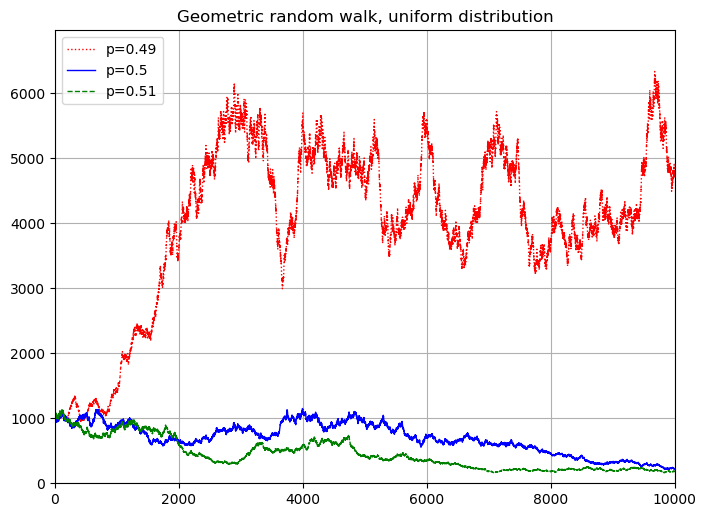

In [5]:
# Create a new figure of size 8x6 inches, using 100 dots per inch
plt.figure(figsize=(8,6), dpi=100)

# Create a new subplot from a grid of 1x1
plt.subplot(111)

# Plot cosine using blue color with a continuous line of width 1 (pixels)
plt.plot(time, price0, color="red", linewidth=1.0, linestyle=":", label="p=" + str(thr0))
plt.plot(time, price1, color="blue", linewidth=1.0, linestyle="-", label="p=" + str(thr1))
plt.plot(time, price2, color="green", linewidth=1.0, linestyle="--", label="p=" + str(thr2))

# Set y limits
maxval = [max(price0), max(price1), max(price2)]
plt.ylim(0, max(maxval)*1.1)

# Set x limits
plt.xlim(0, npoints)

plt.legend(loc="best")

# Set grid
plt.grid()

# set title
plt.title("Geometric random walk, uniform distribution")

### 2.2.- Histogram 

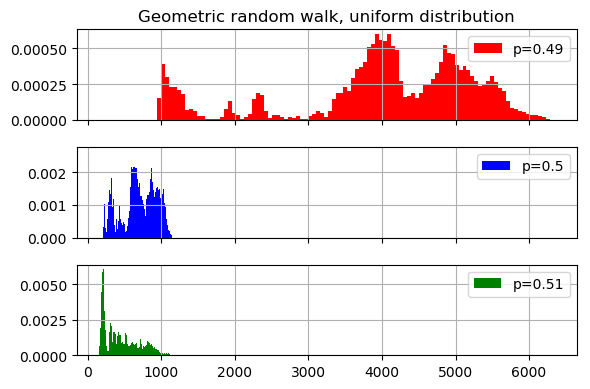

In [6]:
# Create a new figure of size 8x6 inches, using 100 dots per inch

kwargs = dict(alpha=1, bins=100, density=True, stacked=True)

fig, ax = plt.subplots(3,1, figsize=(6,4), dpi=100, sharex=True)

ax[0].hist(price0, **kwargs, color='r', label="p=" + str(thr0))
ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title("Geometric random walk, uniform distribution")

ax[1].hist(price1, **kwargs, color='b', label="p=" + str(thr1))
ax[1].grid()
ax[1].legend(loc='best')

ax[2].hist(price2, **kwargs, color='g', label="p=" + str(thr2))
ax[2].grid()
ax[2].legend(loc='best')

fig.tight_layout()

A geometric random walk with an underlying uniform distribution is very sensible to the threshold used to determine the direction of the walk: if there is a slight bias it will pretty much determine the path followed by the price. A bias tower lower prices (higher decision threshold) will eventually drive down the prices towards zero.

# 3.- Geometric random walk, Gaussian distribution 

In [7]:
# delta for price increase/decrease
delta = 0.01

price0 = [x0]
price1 = [x0]
price2 = [x0]

for i in range(npoints - 1):
    price0.append(randomGeom(price0[i], thr0, delta, 1))
    price1.append(randomGeom(price1[i], thr1, delta, 1))
    price2.append(randomGeom(price2[i], thr2, delta, 1))

### 3.1. - Plot 

Text(0.5, 1.0, 'Geometric random walk, Gaussian distribution')

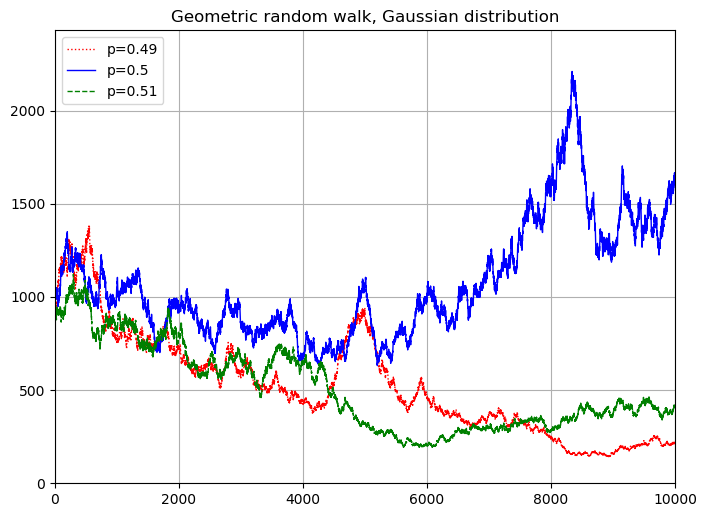

In [8]:
# Create a new figure of size 8x6 inches, using 100 dots per inch
plt.figure(figsize=(8,6), dpi=100)

# Create a new subplot from a grid of 1x1
plt.subplot(111)

# Plot cosine using blue color with a continuous line of width 1 (pixels)
plt.plot(time, price0, color="red", linewidth=1.0, linestyle=":", label="p=" + str(thr0))
plt.plot(time, price1, color="blue", linewidth=1.0, linestyle="-", label="p=" + str(thr1))
plt.plot(time, price2, color="green", linewidth=1.0, linestyle="--", label="p=" + str(thr2))

# Set y limits
maxval = [max(price0), max(price1), max(price2)]
plt.ylim(0, max(maxval)*1.1)

# Set x limits
plt.xlim(0, npoints)

plt.legend(loc="best")

# Set grid
plt.grid()

# set title
plt.title("Geometric random walk, Gaussian distribution")

### 3.2.- Histogram 

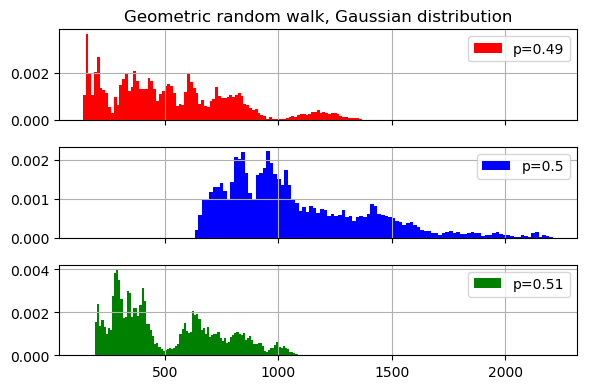

In [9]:
# Create a new figure of size 8x6 inches, using 100 dots per inch

kwargs = dict(alpha=1, bins=100, density=True, stacked=True)

fig, ax = plt.subplots(3,1, figsize=(6,4), dpi=100, sharex=True)

ax[0].hist(price0, **kwargs, color='r', label="p=" + str(thr0))
ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title("Geometric random walk, Gaussian distribution")

ax[1].hist(price1, **kwargs, color='b', label="p=" + str(thr1))
ax[1].grid()
ax[1].legend(loc='best')

ax[2].hist(price2, **kwargs, color='g', label="p=" + str(thr2))
ax[2].grid()
ax[2].legend(loc='best')

fig.tight_layout()

In a geometric random walk with an underlying Gaussian distribution the path followed by the price is still sensitive to the decision threshold, but not as dramatically as in the case of the uniform distribution. The lower the variance, the stronger the sensitivity.

# 4.- Arithmetic random walk, uniform distribution 

In [10]:
# delta for price increase/decrease
delta = 2

price0 = [x0]
price1 = [x0]
price2 = [x0]

for i in range(npoints - 1):
    price0.append(randomArith(price0[i], thr0, delta, 0))
    price1.append(randomArith(price1[i], thr1, delta, 0))
    price2.append(randomArith(price2[i], thr2, delta, 0))

### 4.1. - Plot 

Text(0.5, 1.0, 'Arithmetic random walk, uniform distribution')

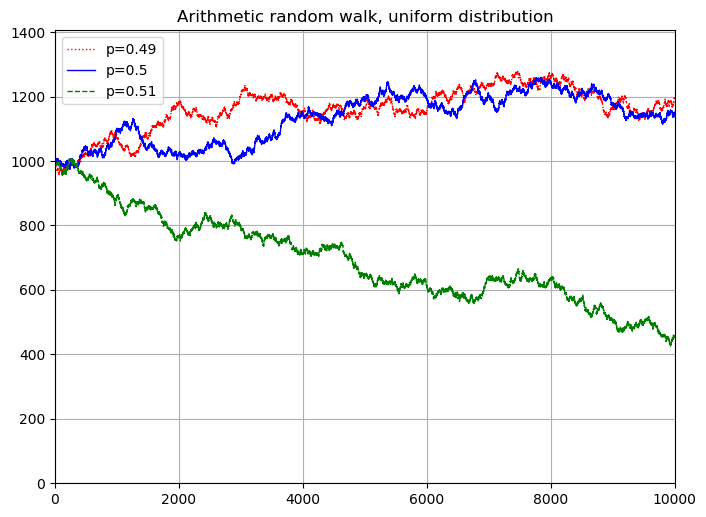

In [11]:
# Create a new figure of size 8x6 inches, using 100 dots per inch
plt.figure(figsize=(8,6), dpi=100)

# Create a new subplot from a grid of 1x1
plt.subplot(111)

# Plot cosine using blue color with a continuous line of width 1 (pixels)
plt.plot(time, price0, color="red", linewidth=1.0, linestyle=":", label="p=" + str(thr0))
plt.plot(time, price1, color="blue", linewidth=1.0, linestyle="-", label="p=" + str(thr1))
plt.plot(time, price2, color="green", linewidth=1.0, linestyle="--", label="p=" + str(thr2))

# Set y limits
maxval = [max(price0), max(price1), max(price2)]
plt.ylim(0, max(maxval)*1.1)

# Set x limits
plt.xlim(0, npoints)

plt.legend(loc="best")

# Set grid
plt.grid()

# set title
plt.title("Arithmetic random walk, uniform distribution")

### 4.2.- Histogram 

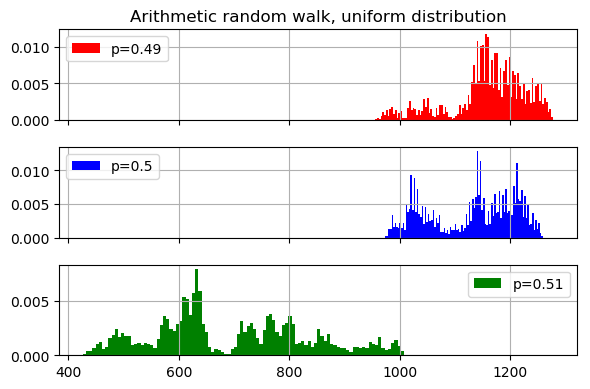

In [12]:
# Create a new figure of size 8x6 inches, using 100 dots per inch

kwargs = dict(alpha=1, bins=100, density=True, stacked=True)

fig, ax = plt.subplots(3,1, figsize=(6,4), dpi=100, sharex=True)

ax[0].hist(price0, **kwargs, color='r', label="p=" + str(thr0))
ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title("Arithmetic random walk, uniform distribution")

ax[1].hist(price1, **kwargs, color='b', label="p=" + str(thr1))
ax[1].grid()
ax[1].legend(loc='best')

ax[2].hist(price2, **kwargs, color='g', label="p=" + str(thr2))
ax[2].grid()
ax[2].legend(loc='best')

fig.tight_layout()

An arithmetic random walk with underlying uniform distribution is especially sensitive when there is a bias towards lower prices (higher decision threshold).

# 5.- Arithmetic random walk, Gaussian distribution 

In [13]:
# delta for price increase/decrease
delta = 2

price0 = [x0]
price1 = [x0]
price2 = [x0]

for i in range(npoints - 1):
    price0.append(randomArith(price0[i], thr0, delta, 1))
    price1.append(randomArith(price1[i], thr1, delta, 1))
    price2.append(randomArith(price2[i], thr2, delta, 1))

### 5.1. - Plot 

Text(0.5, 1.0, 'Arithmetic random walk, Gaussian distribution')

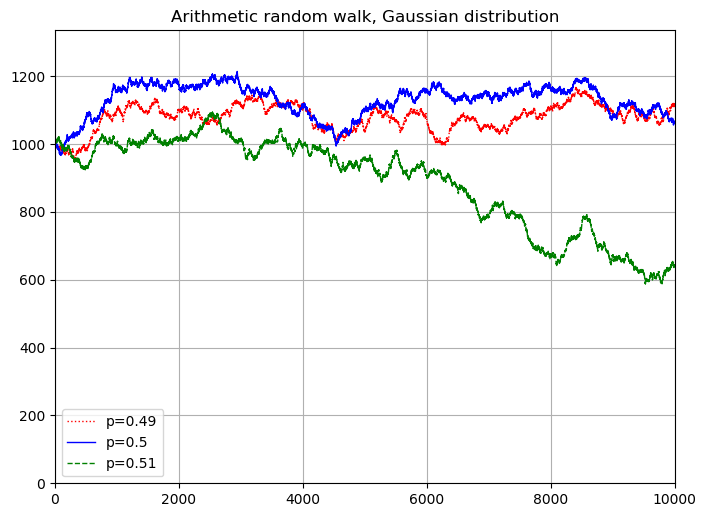

In [14]:
# Create a new figure of size 8x6 inches, using 100 dots per inch
plt.figure(figsize=(8,6), dpi=100)

# Create a new subplot from a grid of 1x1
plt.subplot(111)

# Plot cosine using blue color with a continuous line of width 1 (pixels)
plt.plot(time, price0, color="red", linewidth=1.0, linestyle=":", label="p=" + str(thr0))
plt.plot(time, price1, color="blue", linewidth=1.0, linestyle="-", label="p=" + str(thr1))
plt.plot(time, price2, color="green", linewidth=1.0, linestyle="--", label="p=" + str(thr2))

# Set y limits
maxval = [max(price0), max(price1), max(price2)]
plt.ylim(0, max(maxval)*1.1)


# Set x limits
plt.xlim(0, npoints)

plt.legend(loc="best")

# Set grid
plt.grid()

# set title
plt.title("Arithmetic random walk, Gaussian distribution")

### 5.2.- Histogram 

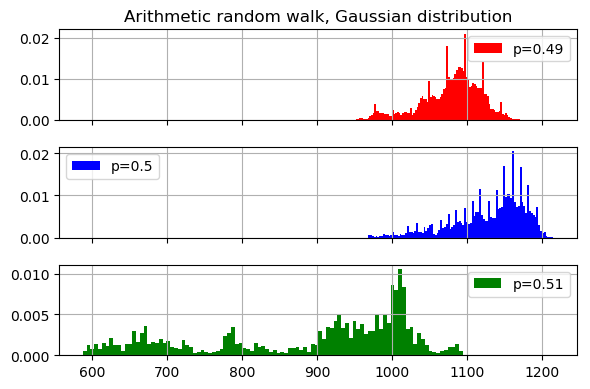

In [15]:
# Create a new figure of size 8x6 inches, using 100 dots per inch

kwargs = dict(alpha=1, bins=100, density=True, stacked=True)

fig, ax = plt.subplots(3,1, figsize=(6,4), dpi=100, sharex=True)

ax[0].hist(price0, **kwargs, color='r', label="p=" + str(thr0))
ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title("Arithmetic random walk, Gaussian distribution")

ax[1].hist(price1, **kwargs, color='b', label="p=" + str(thr1))
ax[1].grid()
ax[1].legend(loc='best')

ax[2].hist(price2, **kwargs, color='g', label="p=" + str(thr2))
ax[2].grid()
ax[2].legend(loc='best')

fig.tight_layout()

An arithmetic random walk with underlying Gaussian distribution is sensitive when there is a bias towards lower prices (higher decision threshold); the lower the variance, the higher the sensitivity.